In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [56]:
df = pd.read_csv('Telco-Customer-Churn.csv')

Data exploration and preprocessing

In [57]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [60]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [61]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [62]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

C:\Users\Kewell\AppData\Local\Temp\ipykernel_4512\1854230864.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [63]:
for column in df.select_dtypes(include=['object']):
    if column != 'customerID':
        df[column] = LabelEncoder().fit_transform(df[column])

Splitting dataset

In [64]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Scaling the dataset

In [65]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Train classification models

In [66]:
#Models
Logistic_Regression = LogisticRegression()
K_Nearest_Neighbors = KNeighborsClassifier()
Support_Vector_Machines = SVC()
Decision_Trees = DecisionTreeClassifier()
Random_Forests = RandomForestClassifier()
Naive_Bayes = GaussianNB()

In [72]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machines': SVC(),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forests': RandomForestClassifier(),
    'Naive Bayes' : GaussianNB()
}

In [73]:
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print(f'{name}:\n\tAccuracy score: {accuracy}\n\tPrecision score: {precision}\n\tRecall score: {recall}\n\tF1 Score: {f1}')

Logistic Regression:
	Accuracy score: 0.812588736393753
	Precision score: 0.6909871244635193
	Recall score: 0.5609756097560976
	F1 Score: 0.6192307692307693
K-Nearest Neighbors:
	Accuracy score: 0.7529578797917653
	Precision score: 0.5505836575875487
	Recall score: 0.4930313588850174
	F1 Score: 0.5202205882352942
Support Vector Machines:
	Accuracy score: 0.8031235210601041
	Precision score: 0.6994949494949495
	Recall score: 0.48257839721254353
	F1 Score: 0.5711340206185567
Decision Trees:
	Accuracy score: 0.735447231424515
	Precision score: 0.5129087779690189
	Recall score: 0.519163763066202
	F1 Score: 0.516017316017316
Random Forests:
	Accuracy score: 0.8017037387600567
	Precision score: 0.6932668329177057
	Recall score: 0.4843205574912892
	F1 Score: 0.5702564102564103
Naive Bayes:
	Accuracy score: 0.7576904874585897
	Precision score: 0.5383663366336634
	Recall score: 0.7578397212543554
	F1 Score: 0.6295224312590448


Hyperparameter tuning

In [113]:
#Using Grid Search

param_grid = {
    'C': [0.1, 1, 10, 20],
    'max_iter': [30, 40, 50, 100, 200, 500, 1000]
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5,error_score='raise')
grid.fit(X_train, y_train)

best_params = grid.best_params_
best_model = grid.best_estimator_
print(f"Best model: {best_model}")
print(f"Best score: {grid.best_score_}")
print(f"Best Parameters: {best_params}")

Best model: LogisticRegression(C=1, max_iter=30)
Best score: 0.8014198782961461
Best Parameters: {'C': 1, 'max_iter': 30}


Feature Selection

In [91]:
#Variance Threshold

selector_vt = VarianceThreshold(threshold=0.1)
X_train_variance = selector_vt.fit_transform(X_train)
X_test_vt = selector_vt.transform(X_test)

In [92]:
#Recursive Feature Elimination

selector_rfe = RFE(Logistic_Regression, n_features_to_select=5, step=1)
X_train_rfe = selector_rfe.fit_transform(X_train, y_train)
X_test_rfe = selector_rfe.transform(X_test)


In [93]:
#Linear Discriminant Analysis

lda = LinearDiscriminantAnalysis(n_components=1)  
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [95]:
#Optimized with VarianceThreshold

vt_optimized = LogisticRegression(**best_params)
vt_optimized.fit(X_train_variance, y_train)
vt_optimized_preds = vt_optimized.predict(X_test_vt)

vt_optimized_accuracy = accuracy_score(y_test, vt_optimized_preds)
vt_optimized_precision = precision_score(y_test, vt_optimized_preds)
vt_optimized_recall = recall_score(y_test, vt_optimized_preds)
vt_optimized_f1 = f1_score(y_test, vt_optimized_preds)

print(f"Optimized Logistic Regression:\nAccuracy: {vt_optimized_accuracy}\nPrecision: {vt_optimized_precision}\nRecall: {vt_optimized_recall}\nF1: {vt_optimized_f1}")

Optimized Logistic Regression:
Accuracy: 0.812588736393753
Precision: 0.6909871244635193
Recall: 0.5609756097560976
F1: 0.6192307692307693


In [97]:
rf_optimized = LogisticRegression(**best_params)
rf_optimized.fit(X_train_rfe, y_train)
rf_optimized_preds = rf_optimized.predict(X_test_rfe)

rf_optimized_accuracy = accuracy_score(y_test, rf_optimized_preds)
rf_optimized_precision = precision_score(y_test, rf_optimized_preds)
rf_optimized_recall = recall_score(y_test, rf_optimized_preds)
rf_optimized_f1 = f1_score(y_test, rf_optimized_preds)

print(f"Optimized Logistic Regression:\nAccuracy: {rf_optimized_accuracy}\nPrecision: {rf_optimized_precision}\nRecall: {rf_optimized_recall}\nF1: {rf_optimized_f1}")

Optimized Logistic Regression:
Accuracy: 0.7936583057264552
Precision: 0.6561085972850679
Recall: 0.5052264808362369
F1: 0.5708661417322834


In [99]:
lda_optimized = LogisticRegression(**best_params)
lda_optimized.fit(X_train_lda, y_train)
lda_optimized_preds = lda_optimized.predict(X_test_lda)

lda_optimized_accuracy = accuracy_score(y_test, lda_optimized_preds)
lda_optimized_precision = precision_score(y_test, lda_optimized_preds)
lda_optimized_recall = recall_score(y_test, lda_optimized_preds)
lda_optimized_f1 = f1_score(y_test, lda_optimized_preds)

print(f"Optimized Logistic Regression:\nAccuracy: {rf_optimized_accuracy}\nPrecision: {rf_optimized_precision}\nRecall: {rf_optimized_recall}\nF1: {rf_optimized_f1}")

Optimized Logistic Regression:
Accuracy: 0.7936583057264552
Precision: 0.6561085972850679
Recall: 0.5052264808362369
F1: 0.5708661417322834


Identifying important features

c:\Users\Kewell\Desktop\DataScience\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: title={'center': 'Feature Importance'}>

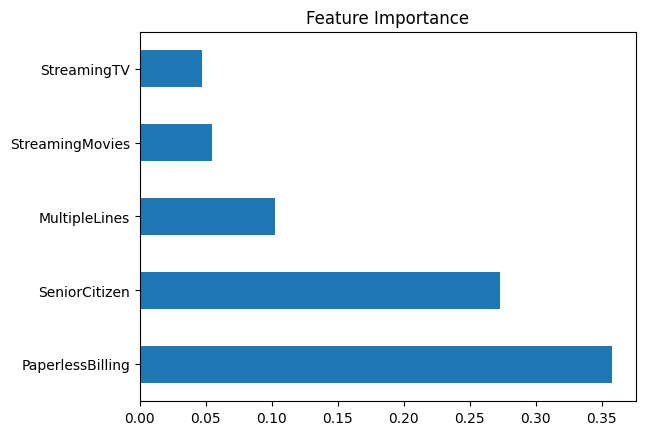

In [114]:
Logistic_Regression.fit(X, y)
importance = Logistic_Regression.coef_[0]

feat_importances = pd.Series(importance, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh',title = 'Feature Importance')


Best model based on the metrics and feature selection, Logistic Regression is the best model for the analysis